# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Load the datas

In [2]:
# Training data
path="train data.csv"
df_train_data=pd.read_csv(path)
df_train_data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
# Test data
path="test data.csv"
df_test_data=pd.read_csv(path)
df_test_data

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


# Exploratory Data Analysis

In [4]:
#Missing data-Train
df_train_data.isnull().sum()


id       0
label    0
tweet    0
dtype: int64

In [5]:
#Missing data-Test
df_test_data.isnull().sum()

id       0
tweet    0
dtype: int64

# Exploring the target 

In [6]:
#count the target
#0-->"not hate"
#1-->"hate"
df_train_data["label"].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

 predict the tweet is hate/not,
 0--> not hate speech,
 1--> hate speech

In [7]:
#hate speech filtering
Hate_tweet=df_train_data[df_train_data["label"]==1]["tweet"]
Hate_tweet

13       @user #cnn calls #michigan middle school 'buil...
14       no comment!  in #australia   #opkillingbay #se...
17                                  retweet if you agree! 
23         @user @user lumpy says i am a . prove it lumpy.
34       it's unbelievable that in the 21st century we'...
                               ...                        
31934    lady banned from kentucky mall. @user  #jcpenn...
31946    @user omfg i'm offended! i'm a  mailbox and i'...
31947    @user @user you don't have the balls to hashta...
31948     makes you ask yourself, who am i? then am i a...
31960    @user #sikh #temple vandalised in in #calgary,...
Name: tweet, Length: 2242, dtype: object

In [8]:
#not hate speech filtering
Not_Hate_tweet=df_train_data[df_train_data["label"]==0]["tweet"]
Not_Hate_tweet

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31956    off fishing tomorrow @user carnt wait first ti...
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31961                     thank you @user for you follow  
Name: tweet, Length: 29720, dtype: object

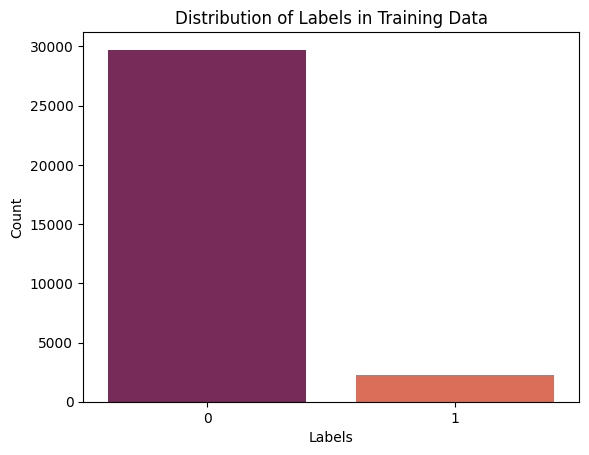

In [9]:
#visualizing the count in bar plot
sns.barplot(x=df_train_data["label"].value_counts().index,y=df_train_data["label"].value_counts(),palette="rocket")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title('Distribution of Labels in Training Data')
plt.show()

# Text Preprocessing
## Data Cleaning

In [10]:
df_train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [11]:
df_train_data["tweet"][:5]

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tweet, dtype: object

In [12]:
df_test_data["tweet"][:5]

0    #studiolife #aislife #requires #passion #dedic...
1     @user #white #supremacists want everyone to s...
2    safe ways to heal your #acne!!    #altwaystohe...
3    is the hp and the cursed child book up for res...
4      3rd #bihday to my amazing, hilarious #nephew...
Name: tweet, dtype: object

In [13]:
# text cleaning
def clean_text(text):
    text = text.lower() #lower_case the text
    text = re.sub('\[.*?\]', '', text) #remove brackets and words
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove urls
    text = re.sub('<.*?>+', '', text) #remove html tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)# remove punctuationz
    text = re.sub('\n', '', text) #remove newline characters from the text.
    text = re.sub('\w*\d\w*', '', text) #remove digits
    text=re.sub(r'[^\x00-\x7F]+', '', text) # remove emoji
    return text

In [14]:
# apply text clean to train data
df_train_data["tweet"]=df_train_data["tweet"].apply(clean_text)
df_train_data["tweet"].head()

0     user when a father is dysfunctional and is so...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3    model   i love u take with u all the time in u...
4                 factsguide society now    motivation
Name: tweet, dtype: object

In [15]:
# apply text clean to test data
df_test_data["tweet"]=df_test_data["tweet"].apply(clean_text)
df_test_data["tweet"].head()

0    studiolife aislife requires passion dedication...
1     user white supremacists want everyone to see ...
2    safe ways to heal your acne    altwaystoheal h...
3    is the hp and the cursed child book up for res...
4       bihday to my amazing hilarious nephew eli a...
Name: tweet, dtype: object

Text(0.5, 1.0, ' Hate speech')

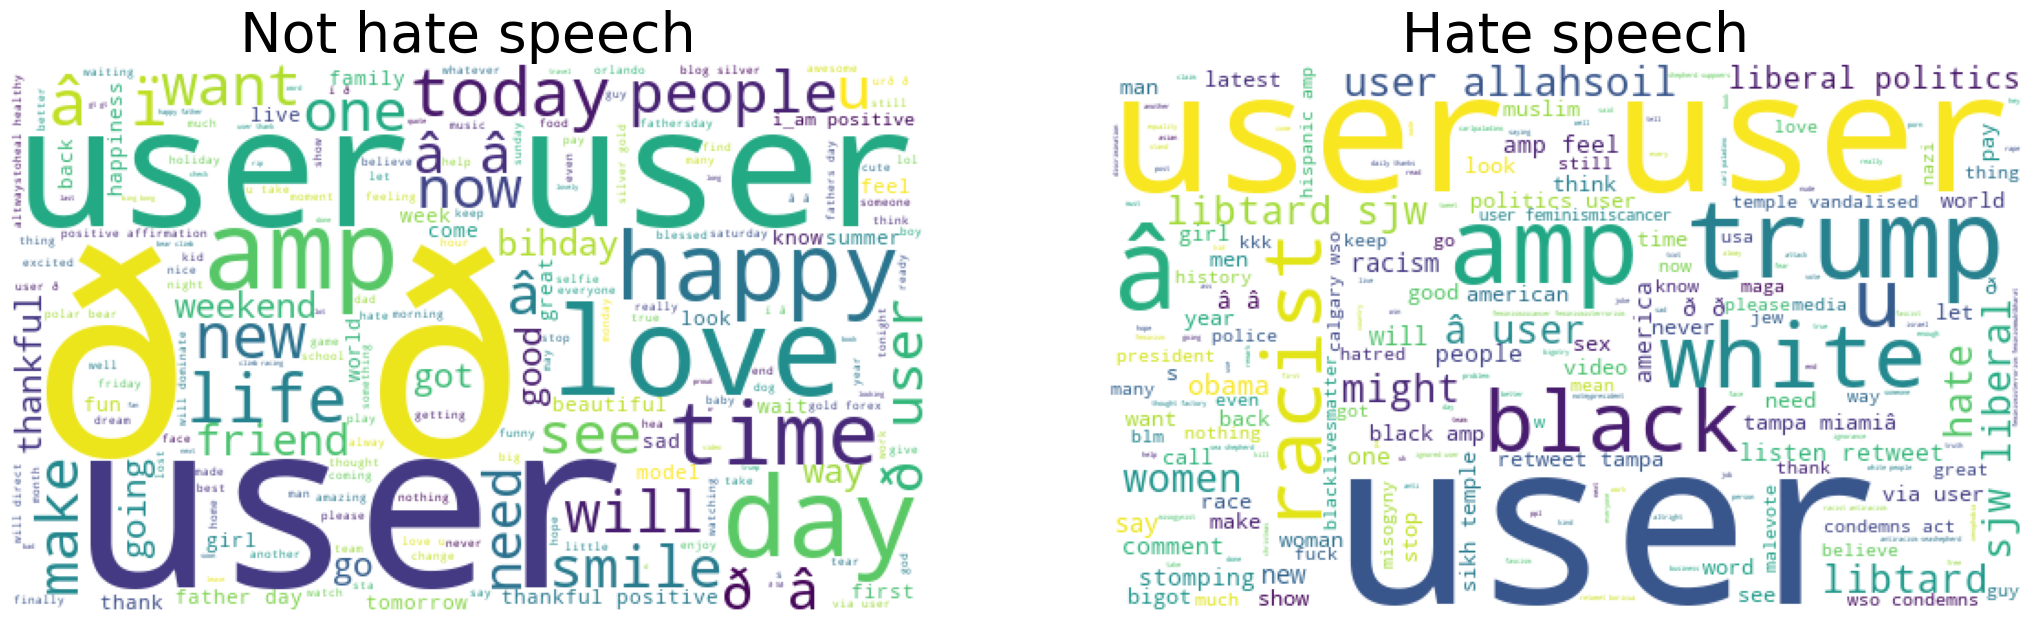

In [16]:
# visualizing the words
from wordcloud import WordCloud
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
#not hate speech
WordCloud1=WordCloud(background_color="white",width=500,height=300).generate(" ".join(Not_Hate_tweet))
ax1.imshow(WordCloud1)
ax1.axis("off")
ax1.set_title('Not hate speech',fontsize=40)
#hate speech
WordCloud2=WordCloud(background_color="white",width=500,height=300).generate(" ".join(Hate_tweet))
ax2.imshow(WordCloud2)
ax2.axis("off")
ax2.set_title(' Hate speech',fontsize=40)


# Tokenization

In [17]:
# split the sentences to word with help of tokenization
from nltk import word_tokenize
df_train_data["tweet"]=df_train_data["tweet"].apply(word_tokenize)
df_test_data["tweet"]=df_test_data["tweet"].apply(word_tokenize)


In [18]:
df_train_data["tweet"]

0        [user, when, a, father, is, dysfunctional, and...
1        [user, user, thanks, for, lyft, credit, i, can...
2                                  [bihday, your, majesty]
3        [model, i, love, u, take, with, u, all, the, t...
4                   [factsguide, society, now, motivation]
                               ...                        
31957                        [ate, user, isz, that, youuu]
31958    [to, see, nina, turner, on, the, airwaves, try...
31959    [listening, to, sad, songs, on, a, monday, mor...
31960    [user, sikh, temple, vandalised, in, in, calga...
31961                 [thank, you, user, for, you, follow]
Name: tweet, Length: 31962, dtype: object

In [19]:
df_test_data["tweet"]

0        [studiolife, aislife, requires, passion, dedic...
1        [user, white, supremacists, want, everyone, to...
2        [safe, ways, to, heal, your, acne, altwaystohe...
3        [is, the, hp, and, the, cursed, child, book, u...
4        [bihday, to, my, amazing, hilarious, nephew, e...
                               ...                        
17192    [thought, factory, leftright, polarisation, tr...
17193    [feeling, like, a, mermaid, hairflip, neverrea...
17194    [hillary, campaigned, today, in, ohioomg, amp,...
17195    [happy, at, work, conference, right, mindset, ...
17196    [my, song, so, glad, free, download, shoegaze,...
Name: tweet, Length: 17197, dtype: object

# Remove stopwords

In [20]:
# stopwords removing
nltk.download("stopwords")
def stop_words(text):
    stop_word = set(stopwords.words('english'))
    text=[words for words in text if words not in stop_word]
    return text

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [21]:
df_train_data["tweet"]=df_train_data["tweet"].apply(stop_words)
df_train_data["tweet"].head()

0    [user, father, dysfunctional, selfish, drags, ...
1    [user, user, thanks, lyft, credit, cant, use, ...
2                                    [bihday, majesty]
3                  [model, love, u, take, u, time, ur]
4                    [factsguide, society, motivation]
Name: tweet, dtype: object

In [22]:
df_test_data["tweet"]=df_test_data["tweet"].apply(stop_words)
df_test_data["tweet"].head()

0    [studiolife, aislife, requires, passion, dedic...
1    [user, white, supremacists, want, everyone, se...
2    [safe, ways, heal, acne, altwaystoheal, health...
3    [hp, cursed, child, book, reservations, alread...
4    [bihday, amazing, hilarious, nephew, eli, ahmi...
Name: tweet, dtype: object

# lemmentaization

In [23]:
# getting root words using lemmentaization
from nltk.stem import WordNetLemmatizer
def lemmentizer(text):
    lemma=WordNetLemmatizer()
    text=" ".join([lemma.lemmatize(words) for words in text])
    return text

In [24]:
df_train_data["tweet"]=df_train_data["tweet"].apply(lemmentizer)
df_train_data["tweet"].head()

0    user father dysfunctional selfish drag kid dys...
1    user user thanks lyft credit cant use cause do...
2                                       bihday majesty
3                          model love u take u time ur
4                        factsguide society motivation
Name: tweet, dtype: object

In [25]:
df_test_data["tweet"]=df_test_data["tweet"].apply(lemmentizer)
df_test_data["tweet"].head()

0    studiolife aislife requires passion dedication...
1    user white supremacist want everyone see new b...
2     safe way heal acne altwaystoheal healthy healing
3    hp cursed child book reservation already yes h...
4    bihday amazing hilarious nephew eli ahmir uncl...
Name: tweet, dtype: object

#### After data cleaning

In [26]:
# Train data
df_train_data

,id,label,tweet
0,1,0,user father dysfunctional selfish drag kid dys...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation
...,...,...,...
31957,31958,0,ate user isz youuu
31958,31959,0,see nina turner airwave trying wrap mantle gen...
31959,31960,0,listening sad song monday morning otw work sad
31960,31961,1,user sikh temple vandalised calgary wso condem...


In [27]:
# test data
df_test_data

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,user white supremacist want everyone see new b...
2,31965,safe way heal acne altwaystoheal healthy healing
3,31966,hp cursed child book reservation already yes h...
4,31967,bihday amazing hilarious nephew eli ahmir uncl...
...,...,...
17192,49155,thought factory leftright polarisation trump l...
17193,49156,feeling like mermaid hairflip neverready forma...
17194,49157,hillary campaigned today ohioomg amp used word...
17195,49158,happy work conference right mindset lead cultu...


# Model Building

In [28]:
# spliting the data as x and y
train_data=df_train_data["tweet"]
test_data=df_test_data["tweet"]
y=df_train_data["label"]

In [29]:
train_data

0        user father dysfunctional selfish drag kid dys...
1        user user thanks lyft credit cant use cause do...
2                                           bihday majesty
3                              model love u take u time ur
4                            factsguide society motivation
                               ...                        
31957                                   ate user isz youuu
31958    see nina turner airwave trying wrap mantle gen...
31959       listening sad song monday morning otw work sad
31960    user sikh temple vandalised calgary wso condem...
31961                                    thank user follow
Name: tweet, Length: 31962, dtype: object

In [30]:
y

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

In [31]:
# spliting train and test data
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.25,random_state=2)

In [32]:
print("train_data",x_train.shape)
print("x_test",x_test.shape)

train_data (23971,)
x_test (7991,)


In [33]:
print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (23971,)
y_test (7991,)


In [34]:
# extraction of features
tfidf = TfidfVectorizer()
train_tfidf = tfidf.fit_transform(x_train).toarray()
test_tfidf = tfidf.transform(x_test).toarray()
test_data_tfidf=tfidf.transform(test_data).toarray()

In [35]:
print(train_tfidf.shape)
print(train_tfidf)

(23971, 30310)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
print(test_tfidf.shape)
print(test_tfidf)

(7991, 30310)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_tfidf,y_train)

LogisticRegression()

In [38]:
# Evaluating the logistic regression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_predict_lr=model.predict(test_tfidf)
print(confusion_matrix(y_test,y_predict_lr))
print(classification_report(y_test,y_predict_lr))

[[7393   15]
 [ 412  171]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7408
           1       0.92      0.29      0.44       583

    accuracy                           0.95      7991
   macro avg       0.93      0.65      0.71      7991
weighted avg       0.95      0.95      0.93      7991



### Naivebayes

In [39]:
from sklearn.naive_bayes import GaussianNB
Model_nb=GaussianNB()
Model_nb.fit(train_tfidf,y_train)

GaussianNB()

In [40]:
# Evaluating the Naive bayes
y_predict_NB=Model_nb.predict(test_tfidf)
print(confusion_matrix(y_test,y_predict_NB))
print(classification_report(y_test,y_predict_NB))

[[6351 1057]
 [ 223  360]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      7408
           1       0.25      0.62      0.36       583

    accuracy                           0.84      7991
   macro avg       0.61      0.74      0.63      7991
weighted avg       0.91      0.84      0.87      7991



### SVM

In [41]:
from sklearn.svm import LinearSVC
model_svc = LinearSVC()
model_svc.fit(train_tfidf, y_train)

LinearSVC()

In [42]:
# Evaluating the SVM
y_predict_svc=model_svc.predict(test_tfidf)
print(confusion_matrix(y_test,y_predict_svc))
print(classification_report(y_test,y_predict_svc))

[[7361   47]
 [ 247  336]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7408
           1       0.88      0.58      0.70       583

    accuracy                           0.96      7991
   macro avg       0.92      0.78      0.84      7991
weighted avg       0.96      0.96      0.96      7991



### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(
    n_estimators=50,      # Use 50 trees instead of the default 100
    max_depth=10,         # Limit the depth of each tree
    max_features='sqrt',  # Consider sqrt(number of features) at each split
    max_samples=0.8,      # Train on 80% of the data
    n_jobs=-1             # Use all available CPU cores
)
model_rf.fit(train_tfidf,y_train)


RandomForestClassifier(max_depth=10, max_samples=0.8, n_estimators=50,
                       n_jobs=-1)

In [44]:
# Evaluating the Random forest
y_predict_rf=model_rf.predict(test_tfidf)
print(confusion_matrix(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))


[[7408    0]
 [ 583    0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7408
           1       0.00      0.00      0.00       583

    accuracy                           0.93      7991
   macro avg       0.46      0.50      0.48      7991
weighted avg       0.86      0.93      0.89      7991



### Long-short-term-memory

In [45]:
# libraies for lstm model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [46]:
# coNvert 2d to 3d for lstm model
n_samples_1=train_tfidf.shape[0]
n_features_1=train_tfidf.shape[1]
time_steps_1=10
features_per_step = n_features_1 // time_steps_1
X_reshaped_1 = train_tfidf.reshape((n_samples_1, time_steps_1, features_per_step))

In [47]:
# build the model
model = Sequential()
model.add(LSTM(50, input_shape=(time_steps_1, features_per_step)))
model.add(Dense(1, activation='sigmoid'))

In [48]:
#compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',"precision","Recall"])

In [49]:
# train the mode
history=model.fit(X_reshaped_1,y_train,validation_split=0.2,epochs=10,batch_size=128)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - Recall: 0.0043 - accuracy: 0.9095 - loss: 0.4220 - precision: 0.0137 - val_Recall: 0.0000e+00 - val_accuracy: 0.9303 - val_loss: 0.2184 - val_precision: 0.0000e+00
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - Recall: 0.0468 - accuracy: 0.9310 - loss: 0.1893 - precision: 0.6778 - val_Recall: 0.1527 - val_accuracy: 0.9387 - val_loss: 0.1918 - val_precision: 0.8226
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - Recall: 0.3271 - accuracy: 0.9490 - loss: 0.1297 - precision: 0.8819 - val_Recall: 0.2784 - val_accuracy: 0.9412 - val_loss: 0.1964 - val_precision: 0.6940
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - Recall: 0.4305 - accuracy: 0.9550 - loss: 0.1137 - precision: 0.8706 - val_Recall: 0.3084 - val_accuracy: 0.9420 - val_loss: 0.2341 - val_precision: 0.6867
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - Recall: 0.5664 - accuracy: 0.9647 - loss: 0.0908 - precision: 0.8262 - val_Recall: 0.3413 - v

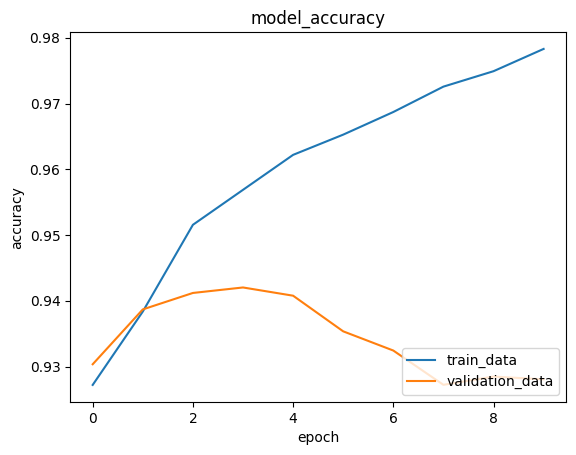

In [50]:
# visualizing the accuracy and loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("model_accuracy")
plt.legend(["train_data","validation_data"],loc="lower right")

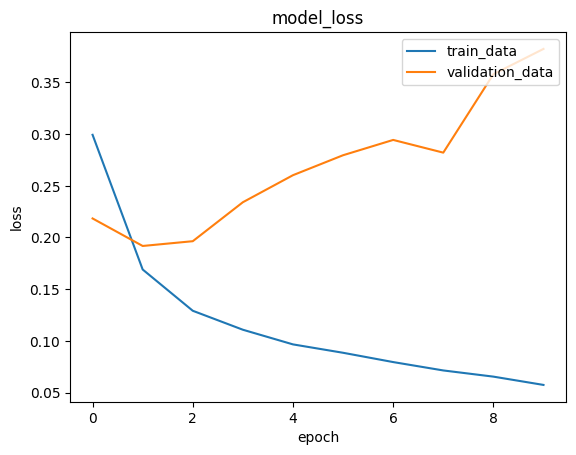

In [51]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("model_loss")
plt.legend(["train_data","validation_data"],loc="upper right")

In [52]:
# Test data for 2d to 3d
n_samples_2=test_tfidf.shape[0]
n_features_2=test_tfidf.shape[1]
time_steps_2=10
features_per_step = n_features_2 // time_steps_2
X_reshaped_2 = test_tfidf.reshape((n_samples_2, time_steps_2, features_per_step))

In [53]:
# Model predict
y_pred_prob_2 = model.predict(X_reshaped_2)
y_pred_2 = (y_pred_prob_2 > 0.5).astype(int)

250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [54]:
print(confusion_matrix(y_test,y_pred_2))
print(classification_report(y_test,y_pred_2))

[[7171  237]
 [ 294  289]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7408
           1       0.55      0.50      0.52       583

    accuracy                           0.93      7991
   macro avg       0.76      0.73      0.74      7991
weighted avg       0.93      0.93      0.93      7991



## fit the imbalance dataset

### Smote Method

In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(train_tfidf, y_train)

In [56]:
y_train.value_counts()

label
0    22312
1     1659
Name: count, dtype: int64

In [57]:
y_resampled.value_counts()

label
0    22312
1    22312
Name: count, dtype: int64

### Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
model_rf_s = RandomForestClassifier(
    n_estimators=50,      # Use 50 trees instead of the default 100
    max_depth=10,         # Limit the depth of each tree
    max_features='sqrt',  # Consider sqrt(number of features) at each split
    max_samples=0.8,      # Train on 80% of the data
    n_jobs=-1             # Use all available CPU cores
)
model_rf_s.fit(X_resampled,y_resampled)


RandomForestClassifier(max_depth=10, max_samples=0.8, n_estimators=50,
                       n_jobs=-1)

In [59]:
y_predict_rf_s=model_rf_s.predict(test_tfidf)
print(confusion_matrix(y_test,y_predict_rf_s))
print(classification_report(y_test,y_predict_rf_s))

[[6993  415]
 [ 287  296]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7408
           1       0.42      0.51      0.46       583

    accuracy                           0.91      7991
   macro avg       0.69      0.73      0.70      7991
weighted avg       0.92      0.91      0.92      7991



 Unlike SMOTE, which generates synthetic samples uniformly, ADASYN adapts the number of synthetic samples based on the distribution of the minority samples, focusing more on difficult-to-learn areas.

In [60]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(train_tfidf, y_train)

In [61]:
y_train.value_counts()

label
0    22312
1     1659
Name: count, dtype: int64

In [62]:
y_adasyn.value_counts()

label
0    22312
1    21852
Name: count, dtype: int64

In [63]:
from sklearn.ensemble import RandomForestClassifier
model_rf_a = RandomForestClassifier(
    n_estimators=50,      # Use 50 trees instead of the default 100
    max_depth=10,         # Limit the depth of each tree
    max_features='sqrt',  # Consider sqrt(number of features) at each split
    max_samples=0.8,      # Train on 80% of the data
    n_jobs=-1             # Use all available CPU cores
)
model_rf_a.fit(X_adasyn,y_adasyn)


RandomForestClassifier(max_depth=10, max_samples=0.8, n_estimators=50,
                       n_jobs=-1)

In [64]:
from sklearn.metrics import confusion_matrix,classification_report
y_predict_rf_a=model_rf_a.predict(test_tfidf)
print(confusion_matrix(y_test,y_predict_rf_a))
print(classification_report(y_test,y_predict_rf_a))

[[7062  346]
 [ 294  289]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      7408
           1       0.46      0.50      0.47       583

    accuracy                           0.92      7991
   macro avg       0.71      0.72      0.72      7991
weighted avg       0.92      0.92      0.92      7991



### Apply class weight

In [65]:
from sklearn.ensemble import RandomForestClassifier
model_rf_1 = RandomForestClassifier(
    n_estimators=50,      # Use 50 trees instead of the default 100
    max_depth=10,         # Limit the depth of each tree
    max_features='sqrt',  # Consider sqrt(number of features) at each split
    max_samples=0.8,      # Train on 80% of the data
    n_jobs=-1,
    class_weight="balanced" 
)
model_rf_1.fit(train_tfidf,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_samples=0.8,
                       n_estimators=50, n_jobs=-1)

In [66]:
from sklearn.metrics import confusion_matrix,classification_report
y_predict_rf_1=model_rf_1.predict(test_tfidf)
print(confusion_matrix(y_test,y_predict_rf_1))
print(classification_report(y_test,y_predict_rf_1))


[[6223 1185]
 [ 156  427]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      7408
           1       0.26      0.73      0.39       583

    accuracy                           0.83      7991
   macro avg       0.62      0.79      0.65      7991
weighted avg       0.92      0.83      0.87      7991



Among the above 3 imbalance dataset method 
-->Smote
-->Adasyn
-->Class weight
In summary, ADASYN is often preferred because it effectively addresses the limitations of class imbalance, resulting in a model that performs more robustly across key metrics such as accuracy, F1 score, and recall.

### Logistic Regression

In [67]:
model_adasyn = LogisticRegression()
model_adasyn.fit(X_adasyn,y_adasyn)

LogisticRegression()

In [68]:
y_predict1=model_adasyn.predict(test_tfidf)
print(confusion_matrix(y_test,y_predict1))
print(classification_report(y_test,y_predict1))

[[6979  429]
 [ 133  450]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      7408
           1       0.51      0.77      0.62       583

    accuracy                           0.93      7991
   macro avg       0.75      0.86      0.79      7991
weighted avg       0.95      0.93      0.94      7991



### Navie bayes

In [69]:
Model_nb_adasyn=GaussianNB()
Model_nb_adasyn.fit(X_adasyn,y_adasyn)

GaussianNB()

In [70]:
y_predict_nb=Model_nb_adasyn.predict(test_tfidf)
print(confusion_matrix(y_test,y_predict_nb))
print(classification_report(y_test,y_predict_nb))

[[6351 1057]
 [ 223  360]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      7408
           1       0.25      0.62      0.36       583

    accuracy                           0.84      7991
   macro avg       0.61      0.74      0.63      7991
weighted avg       0.91      0.84      0.87      7991



### Support vector machine

In [71]:
model_svc_adasyn = LinearSVC()
model_svc_adasyn.fit(X_adasyn,y_adasyn)

LinearSVC()

In [72]:
y_predict_svc=model_svc_adasyn.predict(test_tfidf)
print(confusion_matrix(y_test,y_predict_svc))
print(classification_report(y_test,y_predict_svc))

[[7047  361]
 [ 167  416]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      7408
           1       0.54      0.71      0.61       583

    accuracy                           0.93      7991
   macro avg       0.76      0.83      0.79      7991
weighted avg       0.94      0.93      0.94      7991



### Long-short term memory

In [73]:
n_samples=X_adasyn.shape[0]
n_features=X_adasyn.shape[1]
time_steps=10
features_per_step = n_features // time_steps
X_reshaped = X_adasyn.reshape((n_samples, time_steps, features_per_step))

In [74]:
# building the mode
model_adasyn = Sequential()
model_adasyn.add(LSTM(50, input_shape=(time_steps, features_per_step)))
model_adasyn.add(Dense(1, activation='sigmoid'))

In [75]:
#compiling the model
model_adasyn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',"precision","Recall"])

In [76]:
# train the mode
history_adasyn=model_adasyn.fit(X_reshaped,y_adasyn,validation_split=0.2,epochs=10,batch_size=128)

Epoch 1/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - Recall: 0.3392 - accuracy: 0.7202 - loss: 0.5145 - precision: 0.6719 - val_Recall: 0.6222 - val_accuracy: 0.6222 - val_loss: 0.8362 - val_precision: 1.0000
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - Recall: 0.9290 - accuracy: 0.9278 - loss: 0.1914 - precision: 0.8830 - val_Recall: 0.8558 - val_accuracy: 0.8558 - val_loss: 0.4238 - val_precision: 1.0000
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - Recall: 0.9644 - accuracy: 0.9579 - loss: 0.1249 - precision: 0.9248 - val_Recall: 0.8381 - val_accuracy: 0.8381 - val_loss: 0.4484 - val_precision: 1.0000
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - Recall: 0.9756 - accuracy: 0.9710 - loss: 0.0931 - precision: 0.9474 - val_Recall: 0.9151 - val_accuracy: 0.9151 - val_loss: 0.3125 - val_precision: 1.0000
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - Recall: 0.9852 - accuracy: 0.9798 - loss: 0.0699 - precision: 0.9613 - val_Recall: 0.9411 - val_accur

### Visualize the accuracy and loss

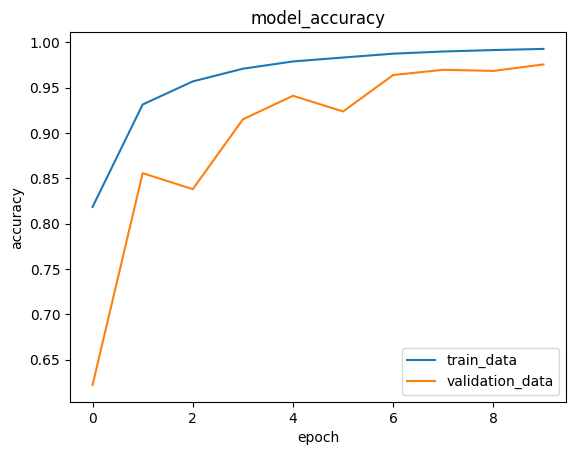

In [77]:
plt.plot(history_adasyn.history["accuracy"])
plt.plot(history_adasyn.history["val_accuracy"])

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("model_accuracy")
plt.legend(["train_data","validation_data"],loc="lower right")

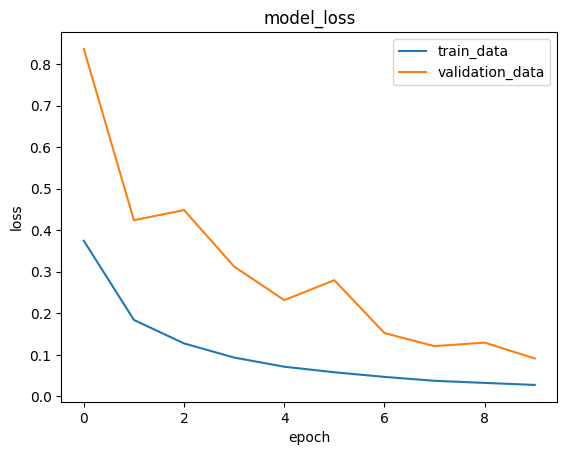

In [78]:
plt.plot(history_adasyn.history["loss"])
plt.plot(history_adasyn.history["val_loss"])

plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("model_loss")
plt.legend(["train_data","validation_data"],loc="upper right")

In [79]:
n_samples=test_tfidf.shape[0]
n_features=test_tfidf.shape[1]
time_steps=10
features_per_step = n_features // time_steps
X_reshaped = test_tfidf.reshape((n_samples, time_steps, features_per_step))

In [80]:
y_pred_prob = model_adasyn.predict(X_reshaped)
y_pred = (y_pred_prob > 0.5).astype(int)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [81]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6955  453]
 [ 238  345]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      7408
           1       0.43      0.59      0.50       583

    accuracy                           0.91      7991
   macro avg       0.70      0.77      0.73      7991
weighted avg       0.93      0.91      0.92      7991



### Boosting Method-XGBOOST

In [82]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
y_predict_xg=model_xg.predict(test_tfidf)
print(confusion_matrix(y_test,y_predict_xg))
print(classification_report(y_test,y_predict_xg))

[[7370   38]
 [ 354  229]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7408
           1       0.86      0.39      0.54       583

    accuracy                           0.95      7991
   macro avg       0.91      0.69      0.76      7991
weighted avg       0.95      0.95      0.94      7991



fit the xgboost in adasyn

In [84]:
model_xgs = XGBClassifier()
model_xgs.fit(X_adasyn, y_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [85]:
y_predict_xgs=model_xgs.predict(test_tfidf)
print(confusion_matrix(y_test,y_predict_xgs))
print(classification_report(y_test,y_predict_xgs))

[[7147  261]
 [ 248  335]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      7408
           1       0.56      0.57      0.57       583

    accuracy                           0.94      7991
   macro avg       0.76      0.77      0.77      7991
weighted avg       0.94      0.94      0.94      7991



In [86]:
#comparing models accuracy
final_df=pd.DataFrame({"Models":['LR','NB','SVM','RF','LSTM','XGBoost'],
                      "score":[accuracy_score(y_test,y_predict1),
                               accuracy_score(y_test,y_predict_nb),
                               accuracy_score(y_test,y_predict_svc),
                               accuracy_score(y_test,y_predict_rf_a),
                               accuracy_score(y_test,y_pred),
                               accuracy_score(y_test,y_predict_xgs)]})
final_df

,Models,score
0,LR,0.929671
1,NB,0.839820
2,SVM,0.933926
3,RF,0.919910
4,LSTM,0.913528
5,XGBoost,0.936303


# Prediction on test data

In [87]:
test_data=df_test_data["tweet"]
test_data

0        studiolife aislife requires passion dedication...
1        user white supremacist want everyone see new b...
2         safe way heal acne altwaystoheal healthy healing
3        hp cursed child book reservation already yes h...
4        bihday amazing hilarious nephew eli ahmir uncl...
                               ...                        
17192    thought factory leftright polarisation trump l...
17193    feeling like mermaid hairflip neverready forma...
17194    hillary campaigned today ohioomg amp used word...
17195    happy work conference right mindset lead cultu...
17196    song glad free download shoegaze newmusic newsong
Name: tweet, Length: 17197, dtype: object

In [88]:
df_final=pd.read_csv("test data.csv")
df_final

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [89]:
# model prediction with test datas and create dataframe
y_predict_adasyn=model_xgs.predict(test_data_tfidf)
df_final["prediction"]=y_predict_adasyn


In [90]:
# dataframe to csv
path="C:/Users/Kavitha/Desktop/CAPSTONE PROJECT/NLP_TWEET_EMOTIONS/final_prediction.csv"
df_final.to_csv(path,index=False)

In [91]:
df_final

,id,tweet,prediction
0,31963,#studiolife #aislife #requires #passion #dedic...,0
1,31964,@user #white #supremacists want everyone to s...,1
2,31965,safe ways to heal your #acne!! #altwaystohe...,0
3,31966,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0
...,...,...,...
17192,49155,thought factory: left-right polarisation! #tru...,1
17193,49156,feeling like a mermaid ð #hairflip #neverre...,0
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,0
17195,49158,"happy, at work conference: right mindset leads...",0


In [92]:
df_final["prediction"].value_counts()

prediction
0    15868
1     1329
Name: count, dtype: int64

# Building the model system

In [93]:
# split the data
x=df_final["tweet"]
y=df_final["prediction"]

In [94]:
# vectoraization
vector=TfidfVectorizer()
x_vectoried=vector.fit_transform(x)

In [95]:
# imbalance to balance the data se
df_final_ad=ADASYN()
x_final,y_final=df_final_ad.fit_resample(x_vectoried,y)
y_final.value_counts()

prediction
1    16093
0    15868
Name: count, dtype: int64

In [96]:
# fit on xgboost
model_final = XGBClassifier()
model_final.fit(x_final, y_final)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [97]:
# store the model using pickle
import pickle
with open('XGBOOST.pkl','wb') as files:
    pickle.dump(model_final,files)

In [98]:
# store the tfid using pickle
with open('vectorizer.pkl', 'wb') as vector_file:
    pickle.dump(vector, vector_file)

In [99]:
#open the model for prediction
with open('XGBOOST.pkl','rb') as files:
    model_final=pickle.load(files)

In [100]:
with open('vectorizer.pkl', 'rb') as vector_file:
    vector = pickle.load(vector_file)


In [101]:
# NOT HATE TWEET PREDICTION
Given_1=["#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsÃ¢Â€Â¦"]
A = vector.transform(Given_1)
prediction=model_final.predict(A)
print(prediction)
if prediction==0:
    print("NOT HATE TWEET")
else:
    print("HATE TWEET")

[0]
NOT HATE TWEET


In [102]:
#  HATE TWEET PREDICTION
Given_2=["thought factory: bbc neutrality on right wing fascism  #politics #media #blm #brexit #trump #leadership &gt;3 "]
vector_2= vector.transform(Given_2).toarray()
prediction_2=model_final.predict(vector_2)
print(prediction_2)
if prediction_2==0:
    print("NOT HATE TWEET")
else:
    print("HATE TWEET")

[1]
HATE TWEET
